# jitcsim tutorial

### Simulation of the Kuramoto model.
The parameters are coupling and the initial angular frequencies.
The initial phase also could be changed in repeated simulations.
The output is plotting the time average of order parameter vs 
strength of the coupling.


In [1]:
import numpy as np
import pylab as plt
from numpy import pi
import networkx as nx
from jitcsim.utility import flatten
from numpy.random import uniform, normal
from jitcsim.visualization import plot_order
from jitcsim.models.kuramoto import Kuramoto_II

In [2]:
np.random.seed(1)

N = 50
coupling0 = 0.3 / (N - 1)
alpha0 = 0.0
omega0 = normal(0, 0.1, N)
initial_state = uniform(-pi, pi, N)
adj = nx.to_numpy_array(nx.complete_graph(N))

parameters = {
    'N': N,
    'adj': adj,
    't_initial': 0.,
    "t_final": 100,
    't_transition': 2.0,
    "interval": 1.0,                    # time interval for sampling
    'initial_state': initial_state,
    'integration_method': 'dopri5',
    "alpha" : alpha0,
    'control': ['coupling', 'omega'],
    "use_omp": False,
    "output": "data",
    "modulename": "km"                  # compiled filename
}

In [3]:
controls = flatten([[coupling0], omega0])
sol = Kuramoto_II(parameters)
sol.compile()

compiled C code


In [4]:
data = sol.simulate(controls)
x = data['x']
t = data['t']
order = sol.order_parameter(x)

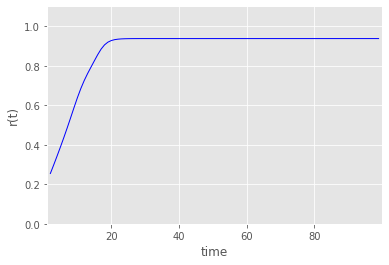

In [5]:
plot_order(t,
           order,
           "data/04.png",
           xlabel="time", 
           ylabel="r(t)",
           close_fig=False);